# Conjectures

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Conjecture

In [1]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
n = 3
d = 2**n

model_list = []

for i in tqdm(range(5)):
    kraus = KrausMap(d=d, rank=d**2)

    model = ModelQuantumMap(
        channel=kraus,
        loss_function=Conj2(index=1),
        optimizer=tf.optimizers.Adam(learning_rate=0.005),
    )

    model.train(inputs=[], targets=[], num_iter=50000, N=0)

    model_list.append(model)

pickle.dump(model_list, open("../../data/conjecture2.p", "wb"))

NameError: name 'np' is not defined

In [ ]:
loss_list = []

for model in model_list:
    loss_list.append(model.loss_train)
pickle.dump(loss_list, open("../../data/conjecture2.p", "wb"))

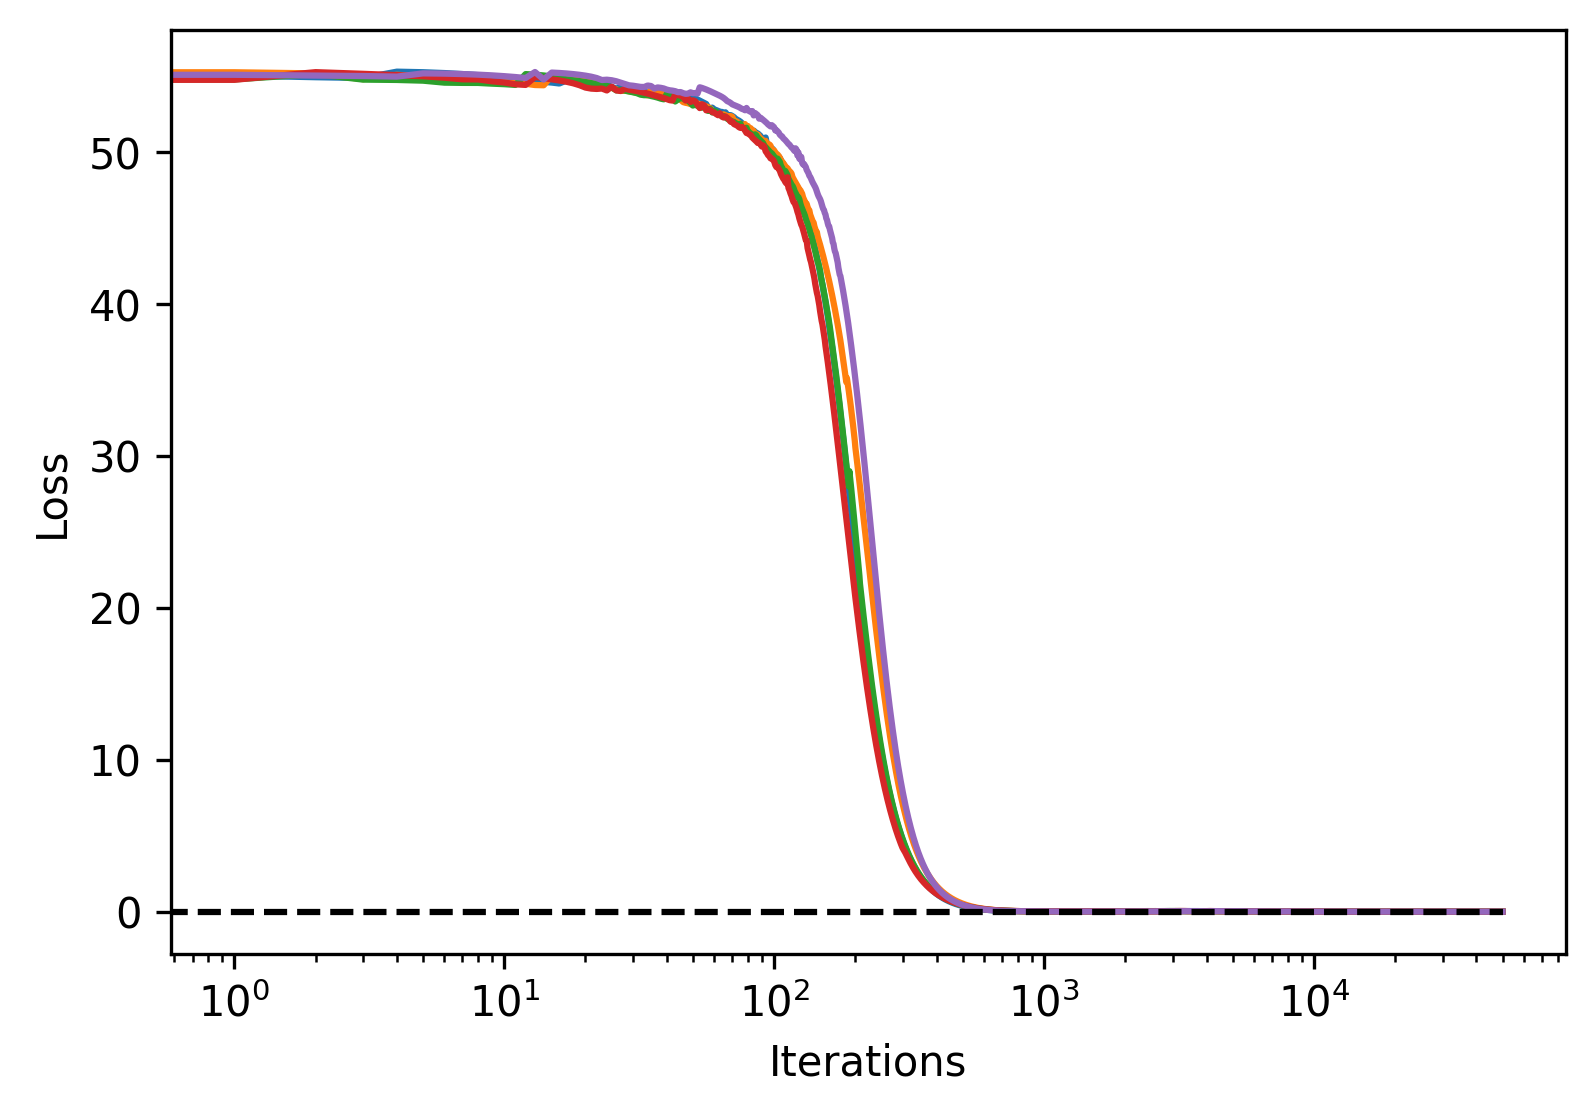

In [17]:
fig = plt.figure(figsize=(6, 4), dpi=300, facecolor="w", edgecolor="k")

loss_list = pickle.load(open("../../data/conjecture2.p", "rb"))

for loss in loss_list:
    plt.plot(loss)
plt.plot([0, 50000], [0, 0], "k--")
plt.xscale("log")
# plt.ylim([-1, 1])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

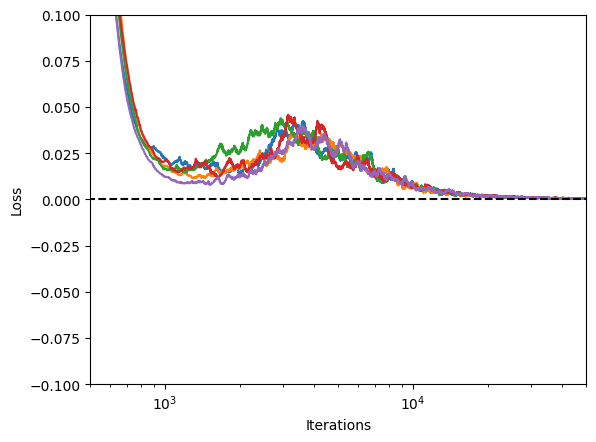

In [18]:
for loss in loss_list:
    plt.plot(loss)
plt.plot([0, 50000], [0, 0], "k--")
plt.xscale("log")
plt.ylim([-0.1, 0.1])
plt.xlim([500, 50000])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [19]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
n = 3
d = 2**n

model_list = []

channel = KrausMap(d=d, rank=d**2)

model = ModelQuantumMap(
    channel=channel,
    loss_function=Conj2(index=1),
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
)

model.train(
    inputs=[],
    targets=[],
    num_iter=1000,
    N=0,
)

loss = model.loss_train

# pickle.dump(model_list, open("../../data/conjecture2_5qubits.p", "wb"))

  0%|          | 0/1000 [00:00<?, ?it/s]

Step:0, train: 55.22344765633622
Step:1, train: 54.926783546029355
Step:2, train: 55.32263310549341
Step:3, train: 55.23820423122258
Step:4, train: 55.11883548580746
Step:5, train: 54.96459810696606
Step:6, train: 54.87519561022627
Step:7, train: 55.11009644247423
Step:8, train: 54.7877888585008
Step:9, train: 54.641896465650014
Step:10, train: 54.52398221733058
Step:11, train: 54.490835523604254
Step:12, train: 54.70802507794847
Step:13, train: 54.57163765520957
Step:14, train: 54.619358889059406
Step:15, train: 54.56117747967412
Step:16, train: 54.42549308090002
Step:17, train: 54.437740456628
Step:18, train: 54.29449454236291
Step:19, train: 54.14299550972625
Step:20, train: 54.27804814354088
Step:21, train: 54.05948700924111
Step:22, train: 54.00965729212666
Step:23, train: 54.026496661470816
Step:24, train: 54.05462706917746
Step:25, train: 53.91612126450683
Step:26, train: 53.796883561949855
Step:27, train: 53.75538136345135
Step:28, train: 53.7629122487371
Step:29, train: 53.702

Step:236, train: 1.8229811119482164
Step:237, train: 1.7718155420047594
Step:238, train: 1.7223328984672293
Step:239, train: 1.674469753122608
Step:240, train: 1.6281651290544872
Step:241, train: 1.5833604620609663
Step:242, train: 1.5399995488034577
Step:243, train: 1.498028409400618
Step:244, train: 1.4573952334379356
Step:245, train: 1.4180502908499406
Step:246, train: 1.3799458565200382
Step:247, train: 1.3430361099083257
Step:248, train: 1.307277095211333
Step:249, train: 1.2726266456222888
Step:250, train: 1.2390442644126196
Step:251, train: 1.206491090553392
Step:252, train: 1.1749298486733437
Step:253, train: 1.1443247415173445
Step:254, train: 1.114641440229967
Step:255, train: 1.0858469911154458
Step:256, train: 1.057909744674042
Step:257, train: 1.0307993262273172
Step:258, train: 1.0044866001749284
Step:259, train: 0.9789435947167817
Step:260, train: 0.9541434368438217
Step:261, train: 0.9300603328867822
Step:262, train: 0.9066695151260262
Step:263, train: 0.883947215350723

Step:460, train: 0.016581816108157454
Step:461, train: 0.016397553056826553
Step:462, train: 0.016216958936006165
Step:463, train: 0.016039941240521216
Step:464, train: 0.015866409612129928
Step:465, train: 0.01569627748917668
Step:466, train: 0.01552945852797194
Step:467, train: 0.01536586953749719
Step:468, train: 0.0152054300133031
Step:469, train: 0.01504806001285175
Step:470, train: 0.014893684692275144
Step:471, train: 0.014742228422313985
Step:472, train: 0.014593618791074903
Step:473, train: 0.014447787476619567
Step:474, train: 0.014304663916696825
Step:475, train: 0.01416418138644815
Step:476, train: 0.014026274582171538
Step:477, train: 0.013890881433781033
Step:478, train: 0.013757939500564476
Step:479, train: 0.0136273896275938
Step:480, train: 0.013499172968494122
Step:481, train: 0.013373233221841474
Step:482, train: 0.01324951530727958
Step:483, train: 0.013127966366717203
Step:484, train: 0.013008533753655627
Step:485, train: 0.012891166496885376
Step:486, train: 0.012

Step:676, train: 0.004354301629163615
Step:677, train: 0.004335732026824246
Step:678, train: 0.004317268560946275
Step:679, train: 0.004298910422420477
Step:680, train: 0.0042806564709820805
Step:681, train: 0.004262505856935661
Step:682, train: 0.004244457879366337
Step:683, train: 0.004226511807047473
Step:684, train: 0.004208666538978889
Step:685, train: 0.00419092154584888
Step:686, train: 0.004173276116894442
Step:687, train: 0.004155729308898515
Step:688, train: 0.004138280497990365
Step:689, train: 0.004120928986047545
Step:690, train: 0.00410367371024023
Step:691, train: 0.004086514048630363
Step:692, train: 0.004069449452416052
Step:693, train: 0.004052478904334578
Step:694, train: 0.004035601961604129
Step:695, train: 0.00401881792022607
Step:696, train: 0.004002125847343052
Step:697, train: 0.003985525018187275
Step:698, train: 0.003969014890984113
Step:699, train: 0.003952594809959464
Step:700, train: 0.003936264236187981
Step:701, train: 0.003920022285299751
Step:702, trai

Step:890, train: 0.0019383793042138109
Step:891, train: 0.00193182750957277
Step:892, train: 0.0019253037392559236
Step:893, train: 0.0019188078915917117
Step:894, train: 0.0019123397955738142
Step:895, train: 0.0019058993237166533
Step:896, train: 0.0018994864383543586
Step:897, train: 0.001893100830713479
Step:898, train: 0.0018867423572146436
Step:899, train: 0.001880411015122263
Step:900, train: 0.0018741065587448702
Step:901, train: 0.001867828982447861
Step:902, train: 0.0018615779318622572
Step:903, train: 0.0018553533682492684
Step:904, train: 0.001849155215843723
Step:905, train: 0.0018429832421915648
Step:906, train: 0.001836837336512076
Step:907, train: 0.0018307173381444386
Step:908, train: 0.0018246232748353464
Step:909, train: 0.0018185549133988843
Step:910, train: 0.0018125120335668043
Step:911, train: 0.001806494523819424
Step:912, train: 0.0018005024150369309
Step:913, train: 0.0017945354246649003
Step:914, train: 0.0017885934619386035
Step:915, train: 0.00178267648465

AttributeError: 'ModelQuantumMap' object has no attribute 'loss_train'

In [20]:
spectrum = channel_spectrum(model.channel)

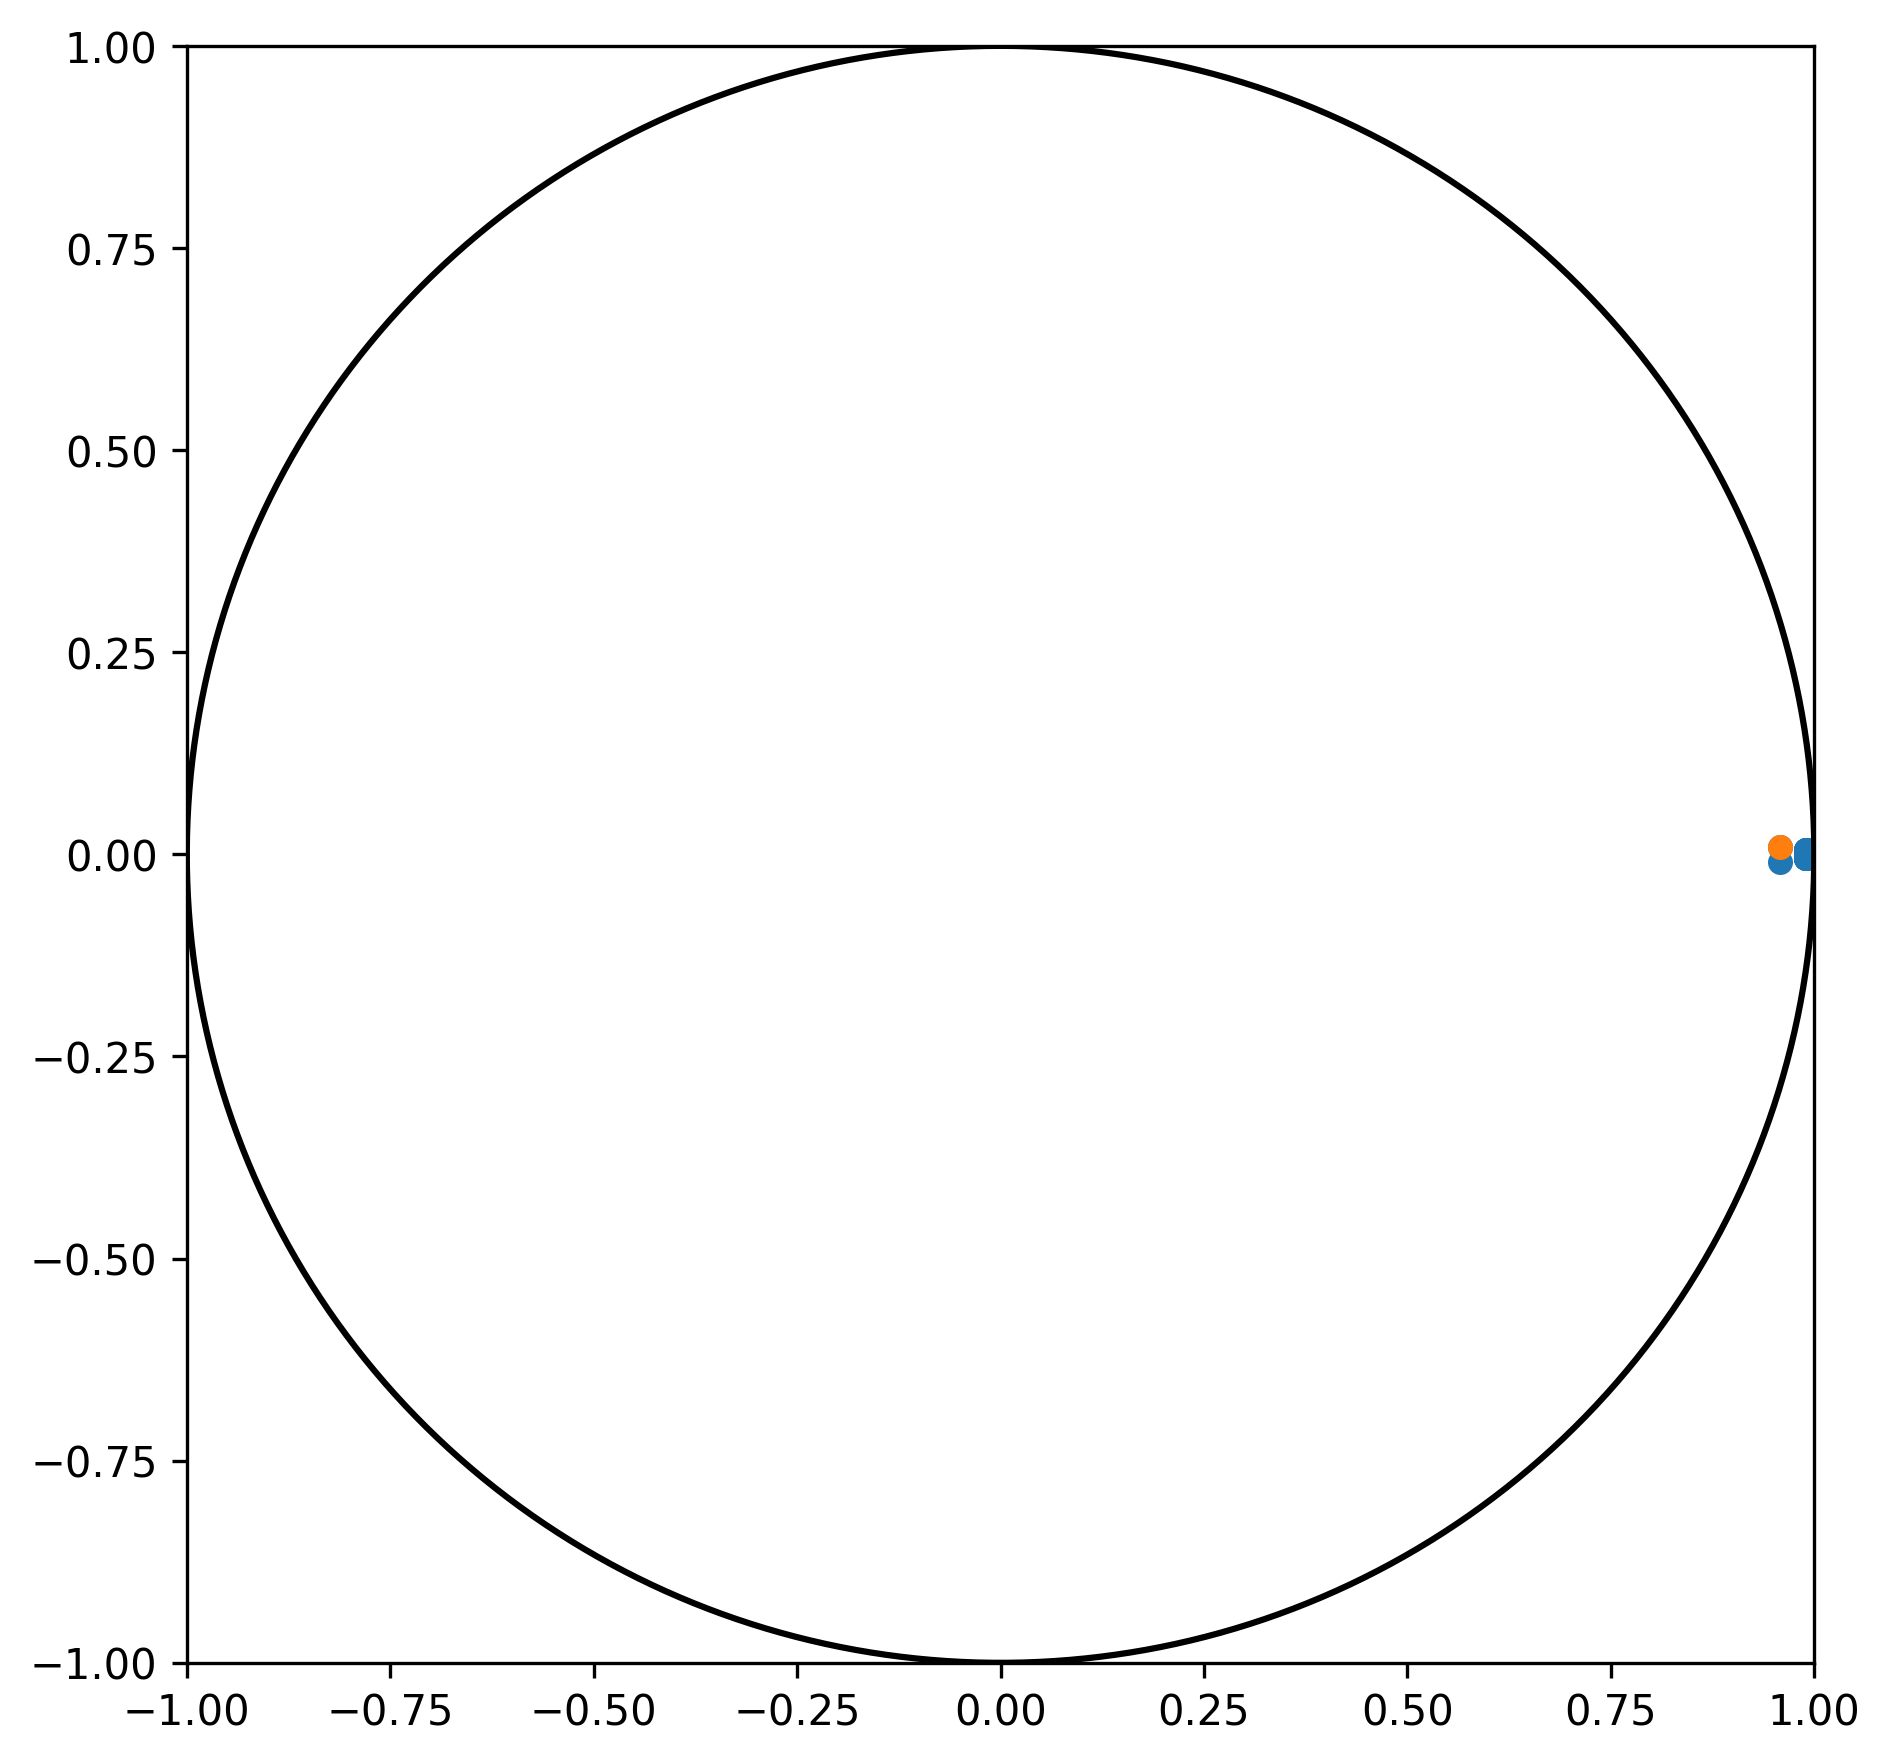

In [23]:
t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(7,7), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(spectrum[:,0], spectrum[:,1], "o", markersize=5)
plt.plot(spectrum[1,0], spectrum[1,1], "o", markersize=5)

plt.plot(*circle, "k-")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [24]:
n = 2
d = 2**n

spectrum = np.zeros((d**2, 2))
spectrum[:-1,0] = 1
spectrum[-1,0] = -0.1

spectrum = tf.cast(tf.convert_to_tensor(spectrum), dtype=precision)

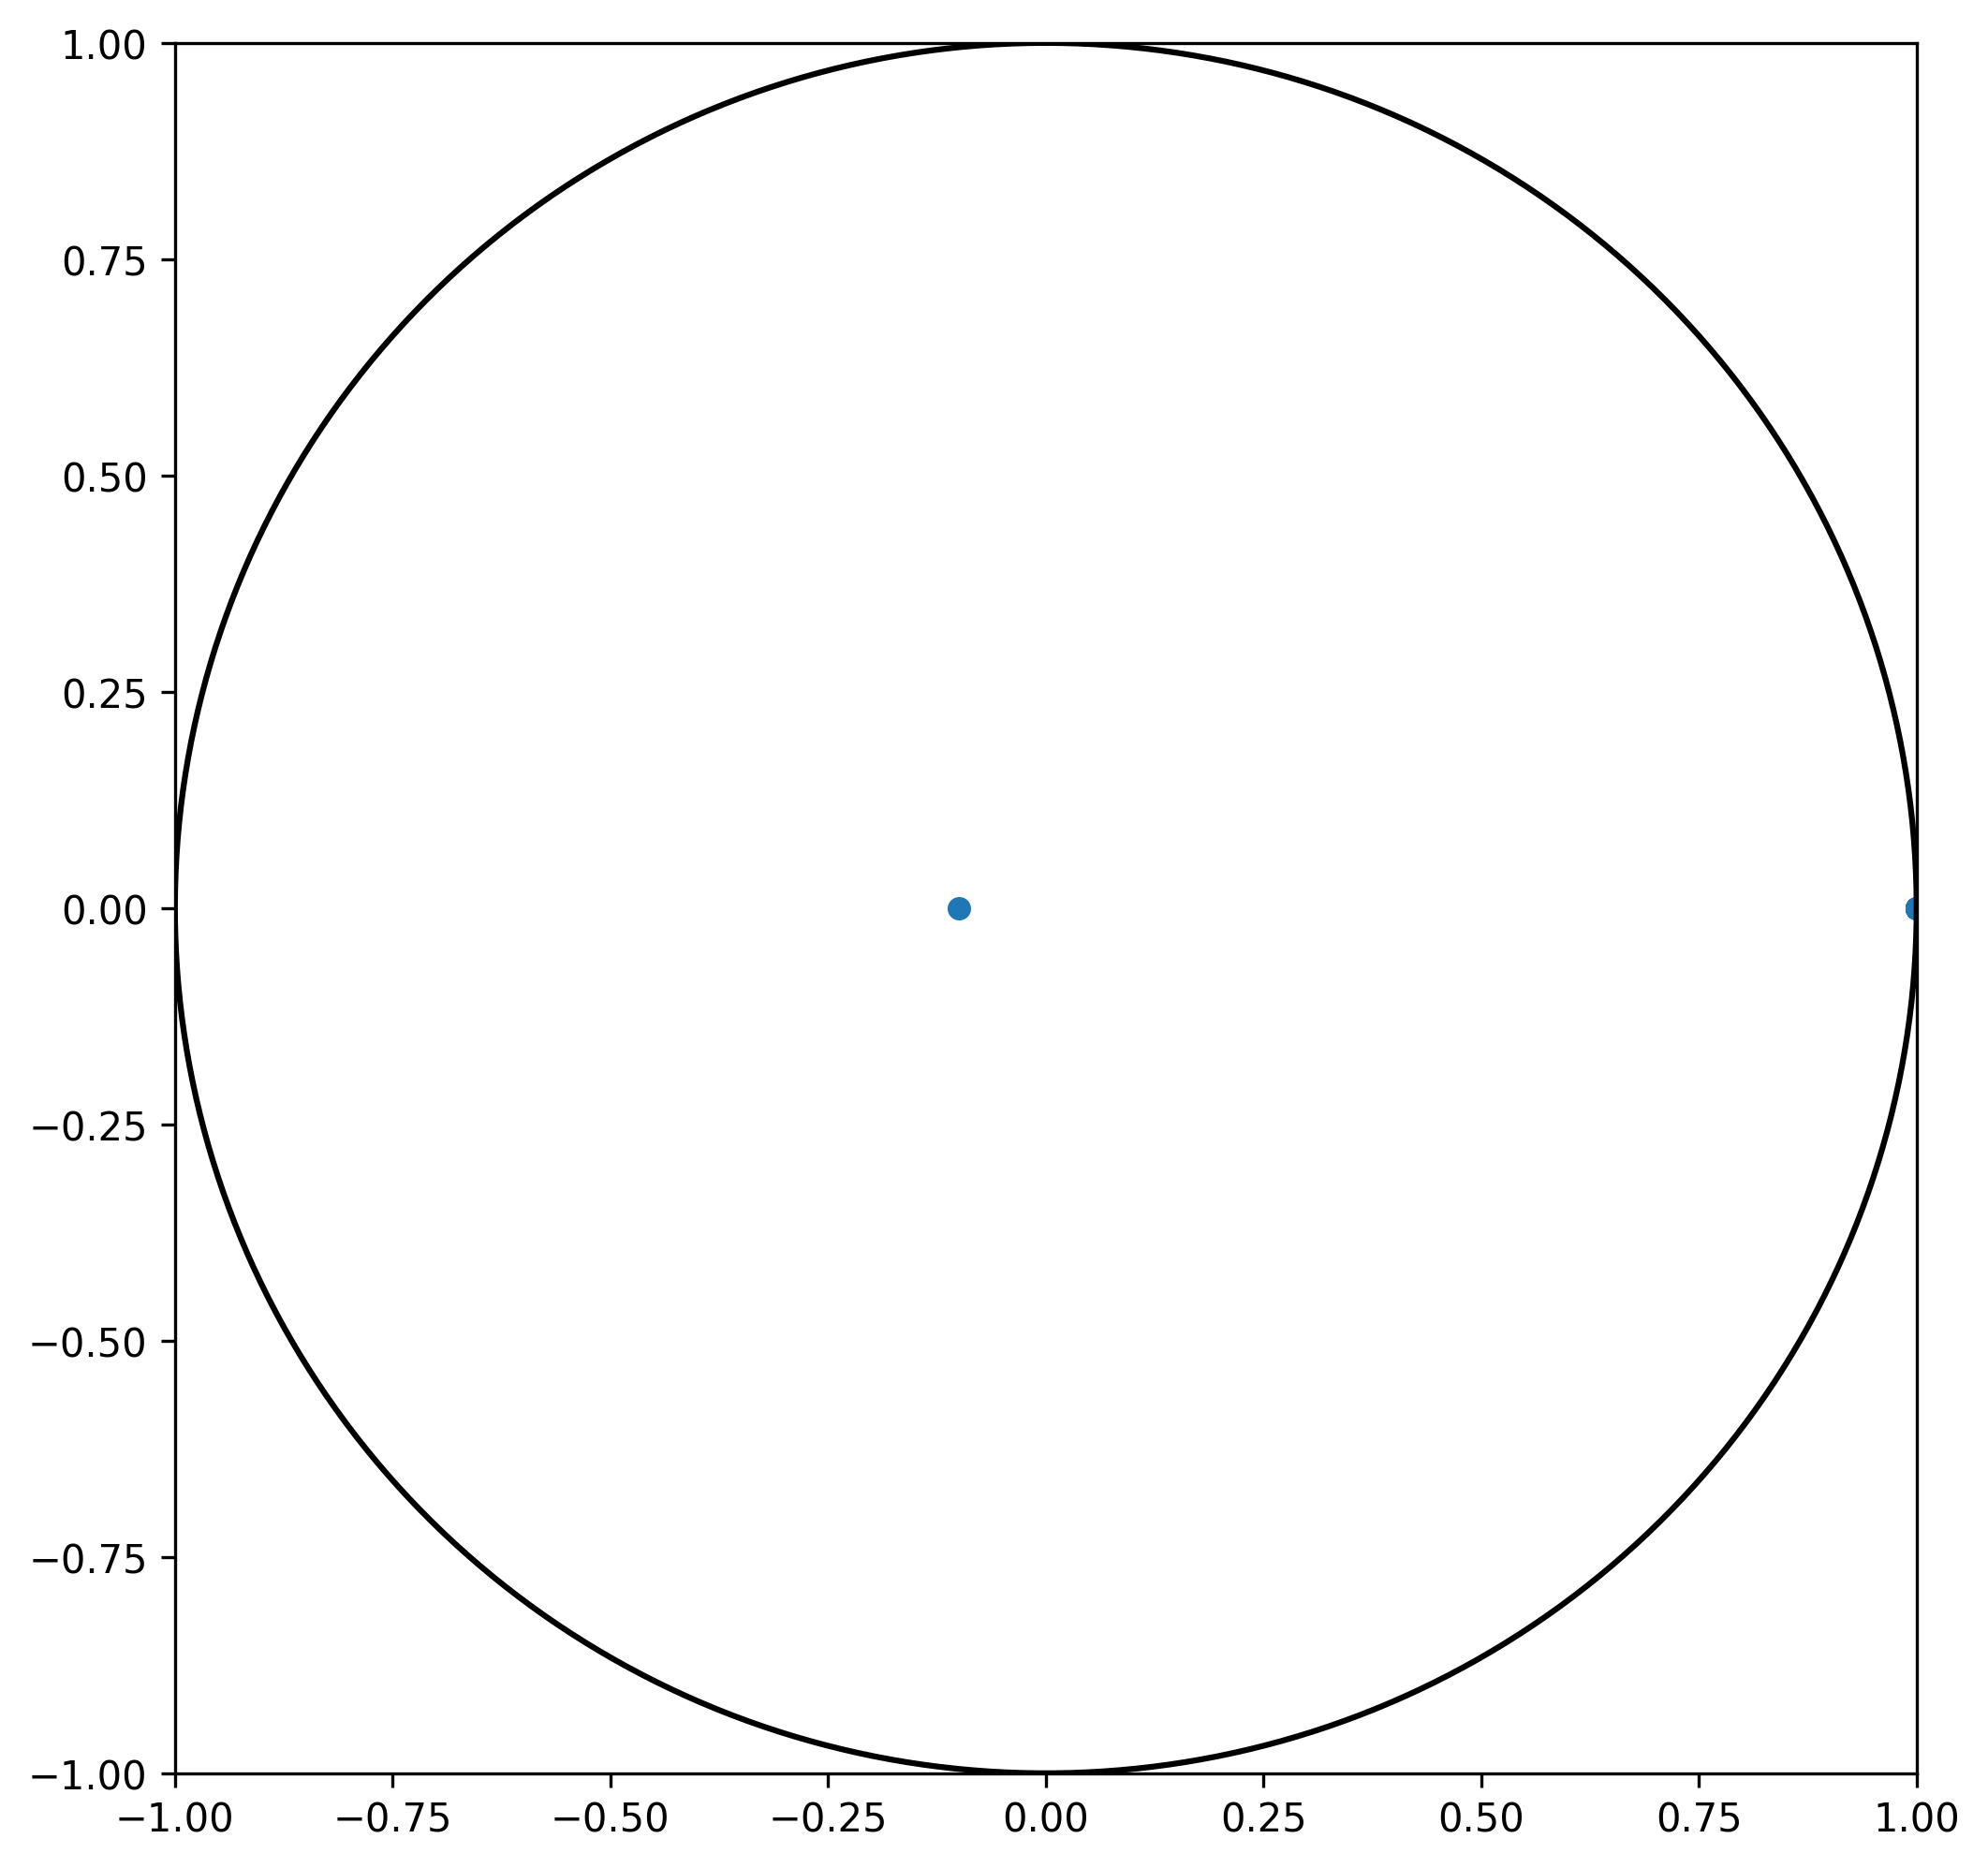

In [25]:
t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(spectrum[:,0], spectrum[:,1], "o", markersize=5)

plt.plot(*circle, "k-")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [30]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
n = 2
d = 2**n

model_list = []

channel = KrausMap(d = d, 
                   rank = d**2)

model = ModelQuantumMap(
                        channel = channel,
                        loss_function = SpectrumDistance(sigma=1, k = 1000),
                        optimizer = tf.optimizers.Adam(learning_rate=0.005),
                       )

model.train(inputs = [spectrum],
            targets = [spectrum],
            num_iter = 1000,
            N = 0
           )

  0%|          | 0/1000 [00:00<?, ?it/s]

Step:0, train: 0.9290096001482784
Step:1, train: 0.9270286535688944
Step:2, train: 0.9250789397131057
Step:3, train: 0.9231440312668422
Step:4, train: 0.9212131496615932
Step:5, train: 0.9192787824141014
Step:6, train: 0.9173353961410081
Step:7, train: 0.9153785340612114
Step:8, train: 0.9134044301414616
Step:9, train: 0.9114100017611129
Step:10, train: 0.9093927172791659
Step:11, train: 0.907350475920801
Step:12, train: 0.905281481388584
Step:13, train: 0.9031841679532394
Step:14, train: 0.9010571524897385
Step:15, train: 0.8988991929145661
Step:16, train: 0.8967091559353082
Step:17, train: 0.8944859934138085
Step:18, train: 0.8922287260599467
Step:19, train: 0.8899364520321548
Step:20, train: 0.8876083419365335
Step:21, train: 0.8852436338104519
Step:22, train: 0.882841646379091
Step:23, train: 0.8804017448627117
Step:24, train: 0.8779233475450654
Step:25, train: 0.8754058956689668
Step:26, train: 0.8728488600990575
Step:27, train: 0.8702517284528964
Step:28, train: 0.867614014197578

Step:234, train: 0.11363019673360031
Step:235, train: 0.11196906816762242
Step:236, train: 0.11032530125977147
Step:237, train: 0.10869905679957592
Step:238, train: 0.10709048963717827
Step:239, train: 0.10549974280775398
Step:240, train: 0.10392695210119285
Step:241, train: 0.10237224805053924
Step:242, train: 0.1008357490760402
Step:243, train: 0.09931756600029851
Step:244, train: 0.09781780086663805
Step:245, train: 0.09633654639921785
Step:246, train: 0.09487388502652327
Step:247, train: 0.09342989154151937
Step:248, train: 0.09200462800634568
Step:249, train: 0.09059814464396043
Step:250, train: 0.089210484543223
Step:251, train: 0.08784167610583604
Step:252, train: 0.08649173694379808
Step:253, train: 0.08516067537006378
Step:254, train: 0.08384848535930756
Step:255, train: 0.08255515310271544
Step:256, train: 0.08128065085971858
Step:257, train: 0.0800249400227947
Step:258, train: 0.07878797182370334
Step:259, train: 0.07756968624129745
Step:260, train: 0.07637001171202562
Step:

Step:453, train: 0.011715879337775625
Step:454, train: 0.01166799172320121
Step:455, train: 0.011620698466906831
Step:456, train: 0.0115739897694086
Step:457, train: 0.011527855924580832
Step:458, train: 0.011482287593573837
Step:459, train: 0.011437275973100736
Step:460, train: 0.011392811369525413
Step:461, train: 0.011348884830476469
Step:462, train: 0.011305488255415108
Step:463, train: 0.011262612483917578
Step:464, train: 0.011220249429261475
Step:465, train: 0.011178390599552834
Step:466, train: 0.011137028571576169
Step:467, train: 0.011096154365669353
Step:468, train: 0.011055761173425438
Step:469, train: 0.011015840451488734
Step:470, train: 0.010976385082328455
Step:471, train: 0.010937387470003945
Step:472, train: 0.010898840448568703
Step:473, train: 0.01086073715853808
Step:474, train: 0.01082307064630772
Step:475, train: 0.010785833698846559
Step:476, train: 0.010749019607878885
Step:477, train: 0.010712622157606044
Step:478, train: 0.010676634569127486
Step:479, train: 

Step:670, train: 0.0076639087660090865
Step:671, train: 0.0076587400305137
Step:672, train: 0.007653624103815204
Step:673, train: 0.007648560671711824
Step:674, train: 0.00764354911508236
Step:675, train: 0.007638588992024076
Step:676, train: 0.0076336798312302
Step:677, train: 0.007628821265565966
Step:678, train: 0.007624012839195338
Step:679, train: 0.007619253904677992
Step:680, train: 0.007614544197063422
Step:681, train: 0.007609883317761357
Step:682, train: 0.00760527064908656
Step:683, train: 0.00760070579029426
Step:684, train: 0.007596188395116776
Step:685, train: 0.007591718139863035
Step:686, train: 0.007587294325318128
Step:687, train: 0.0075829169357790605
Step:688, train: 0.007578585089310419
Step:689, train: 0.007574298694725812
Step:690, train: 0.0075700572833674595
Step:691, train: 0.007565860327937379
Step:692, train: 0.007561707460537415
Step:693, train: 0.007557598455604664
Step:694, train: 0.007553532884798431
Step:695, train: 0.007549510310795204
Step:696, train:

Step:890, train: 0.0072693266747549945
Step:891, train: 0.007269416379948712
Step:892, train: 0.007269514774292052
Step:893, train: 0.007269621738861254
Step:894, train: 0.007269737285964917
Step:895, train: 0.007269861231077535
Step:896, train: 0.007269993660317109
Step:897, train: 0.007270134373930759
Step:898, train: 0.0072702834226443525
Step:899, train: 0.007270440679057133
Step:900, train: 0.0072706060622864666
Step:901, train: 0.007270779520604842
Step:902, train: 0.0072709609916632445
Step:903, train: 0.007271150430558926
Step:904, train: 0.007271347706793163
Step:905, train: 0.007271552863763464
Step:906, train: 0.007271765843522404
Step:907, train: 0.007271986503087469
Step:908, train: 0.007272214824919798
Step:909, train: 0.00727245077531169
Step:910, train: 0.007272694310361594
Step:911, train: 0.007272945361560312
Step:912, train: 0.007273203774670556
Step:913, train: 0.007273469582769199
Step:914, train: 0.007273742745176781
Step:915, train: 0.007274023154234754
Step:916,

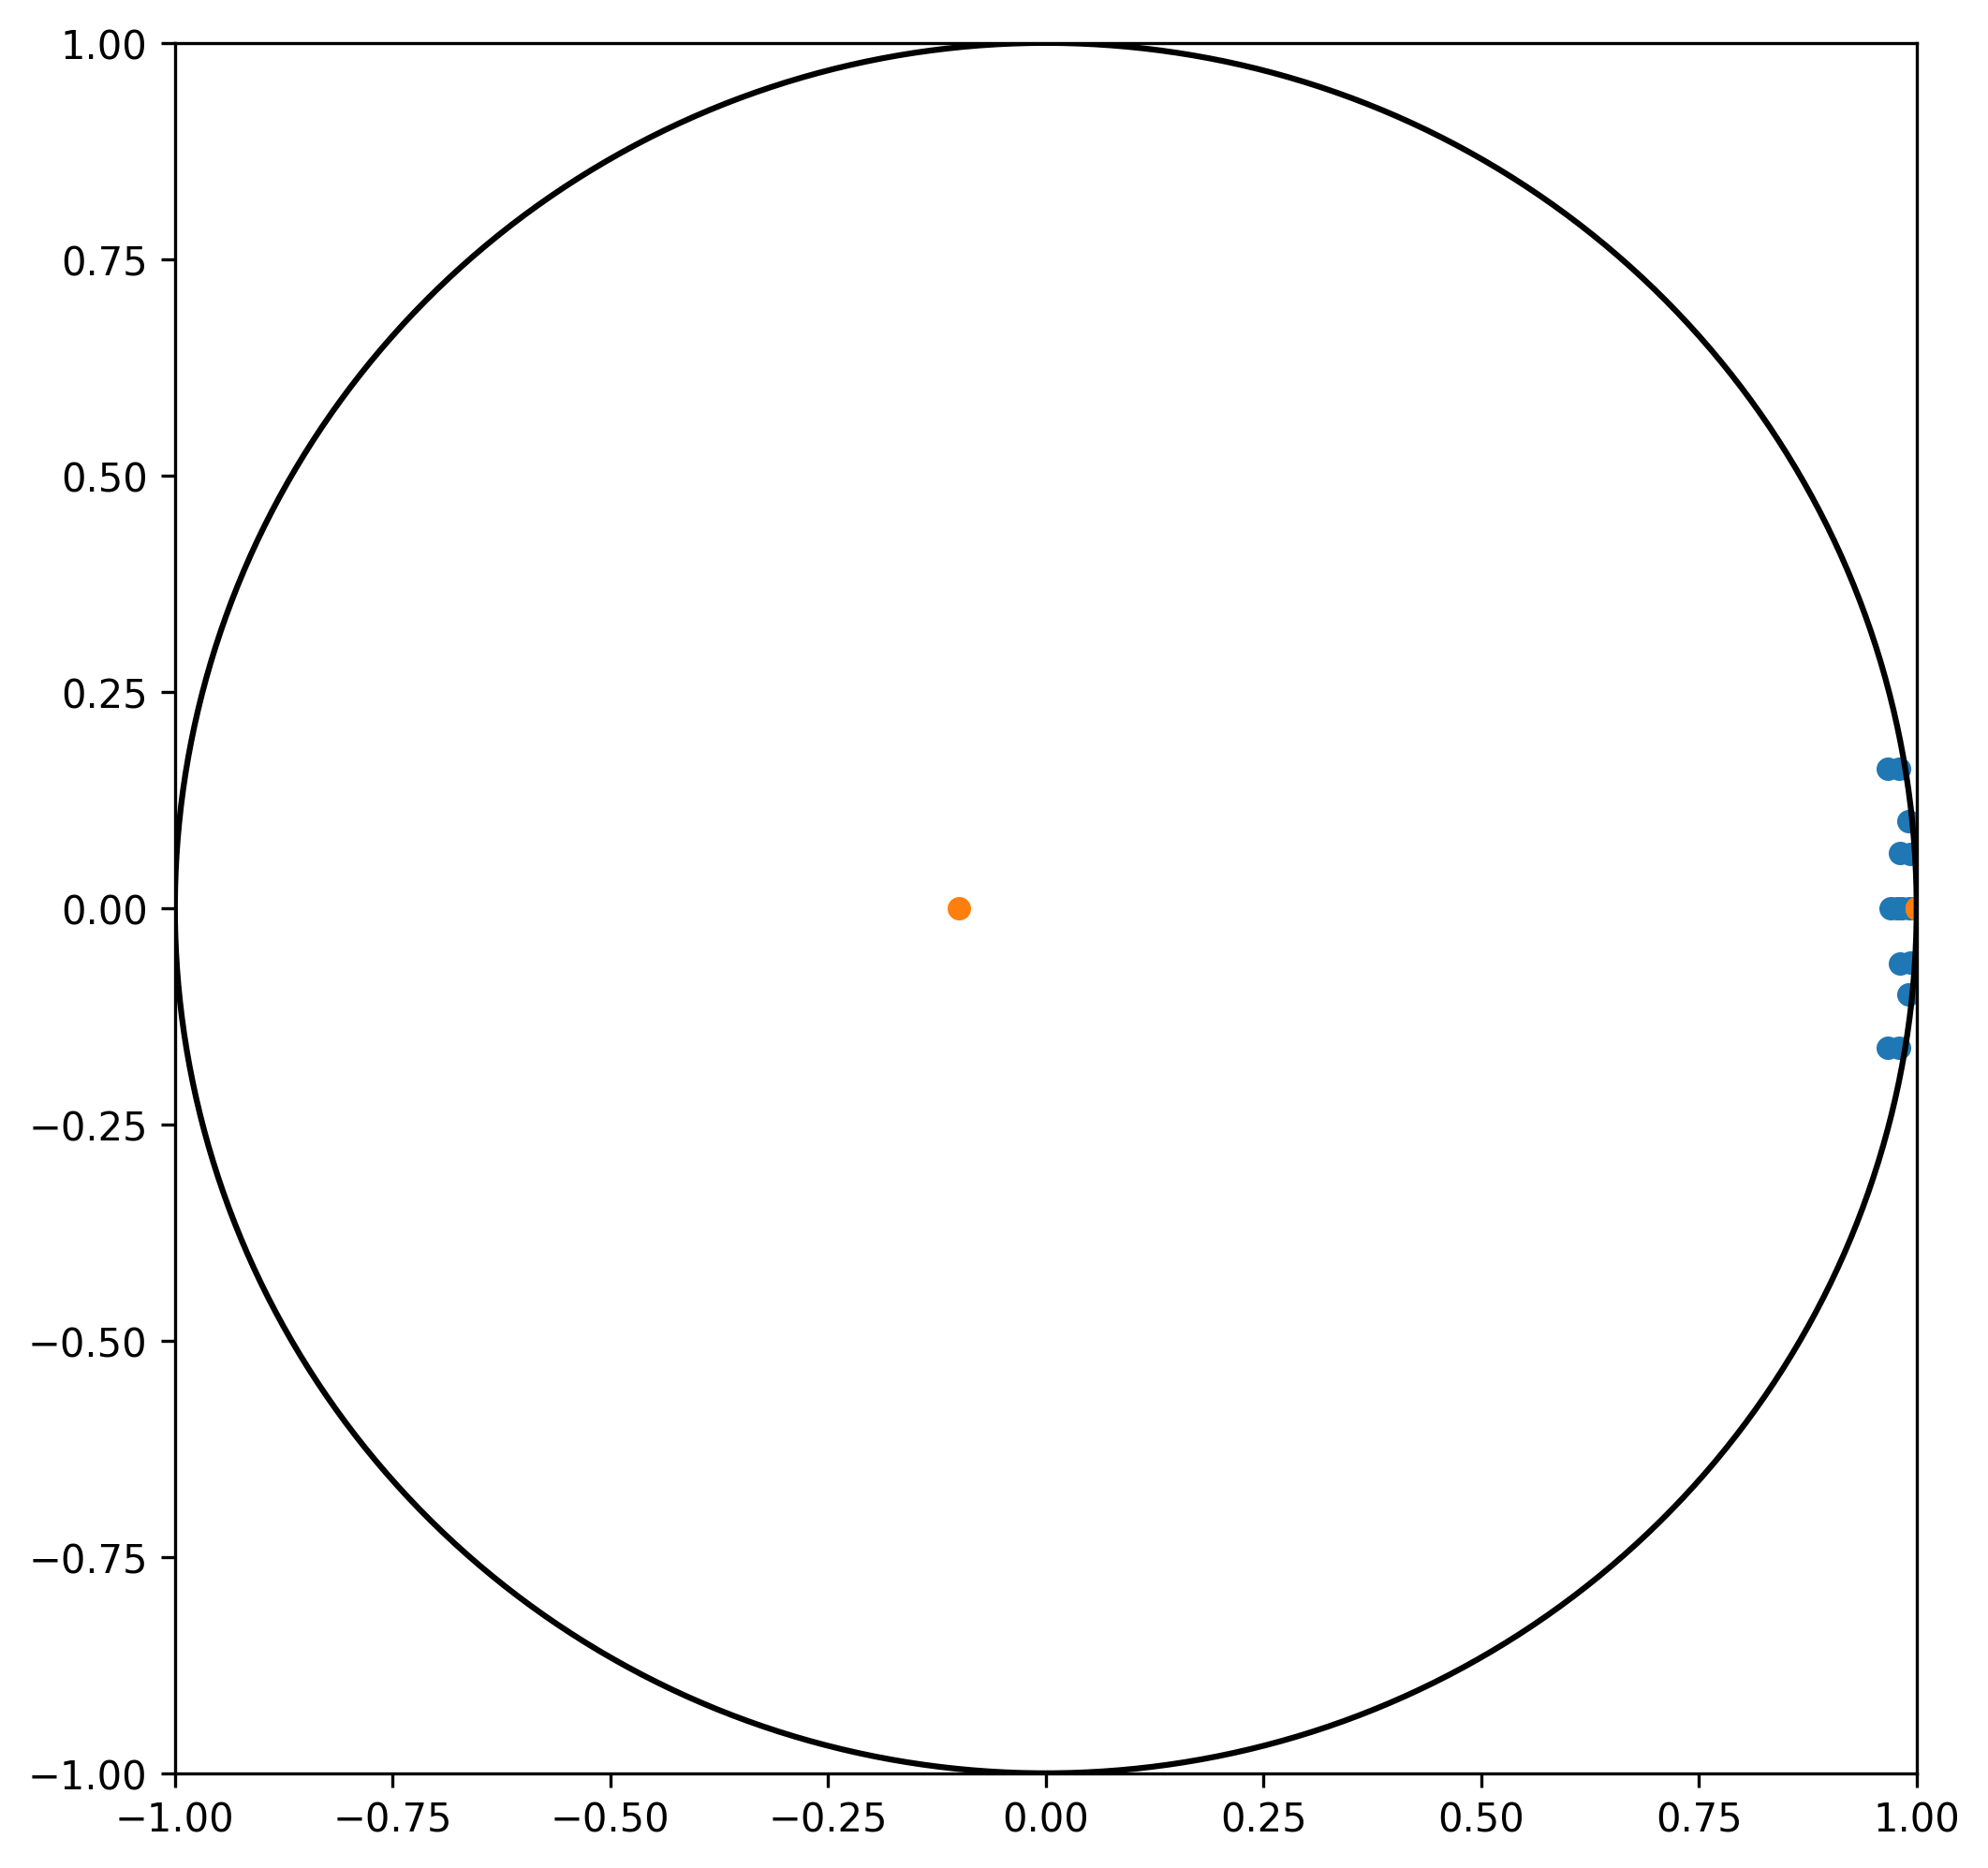

In [31]:
spectrum1 = channel_spectrum(model.channel)

t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(spectrum1[:,0], spectrum1[:,1], "o", markersize=5)
plt.plot(spectrum[:,0], spectrum[:,1], "o", markersize=5)

plt.plot(*circle, "k-")
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

## Conjecture

In [42]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
n = 3
d = 2**n
index = 0
kraus = KrausMap(d = d, 
                 rank = d**2)

model = ModelQuantumMap(
                        channel = kraus,
                        loss_function = Conj3(index=index, sign = 1),
                        optimizer = tf.optimizers.Adam(learning_rate=0.01),
                        logger = Logger(10, Conj3(index=index, sign = 1), verbose=True),
                       )

In [43]:
model.train(inputs = [],
            targets = [],
            num_iter = 1000,
            N = 0
           )

  0%|          | 0/1000 [00:00<?, ?it/s]

3.6114550135181367e-16 None
3.6114550134792923e-16 None
3.611455013407429e-16 None
3.61145501331812e-16 None
3.611455013209888e-16 None
3.61145501308812e-16 None


KeyboardInterrupt: 

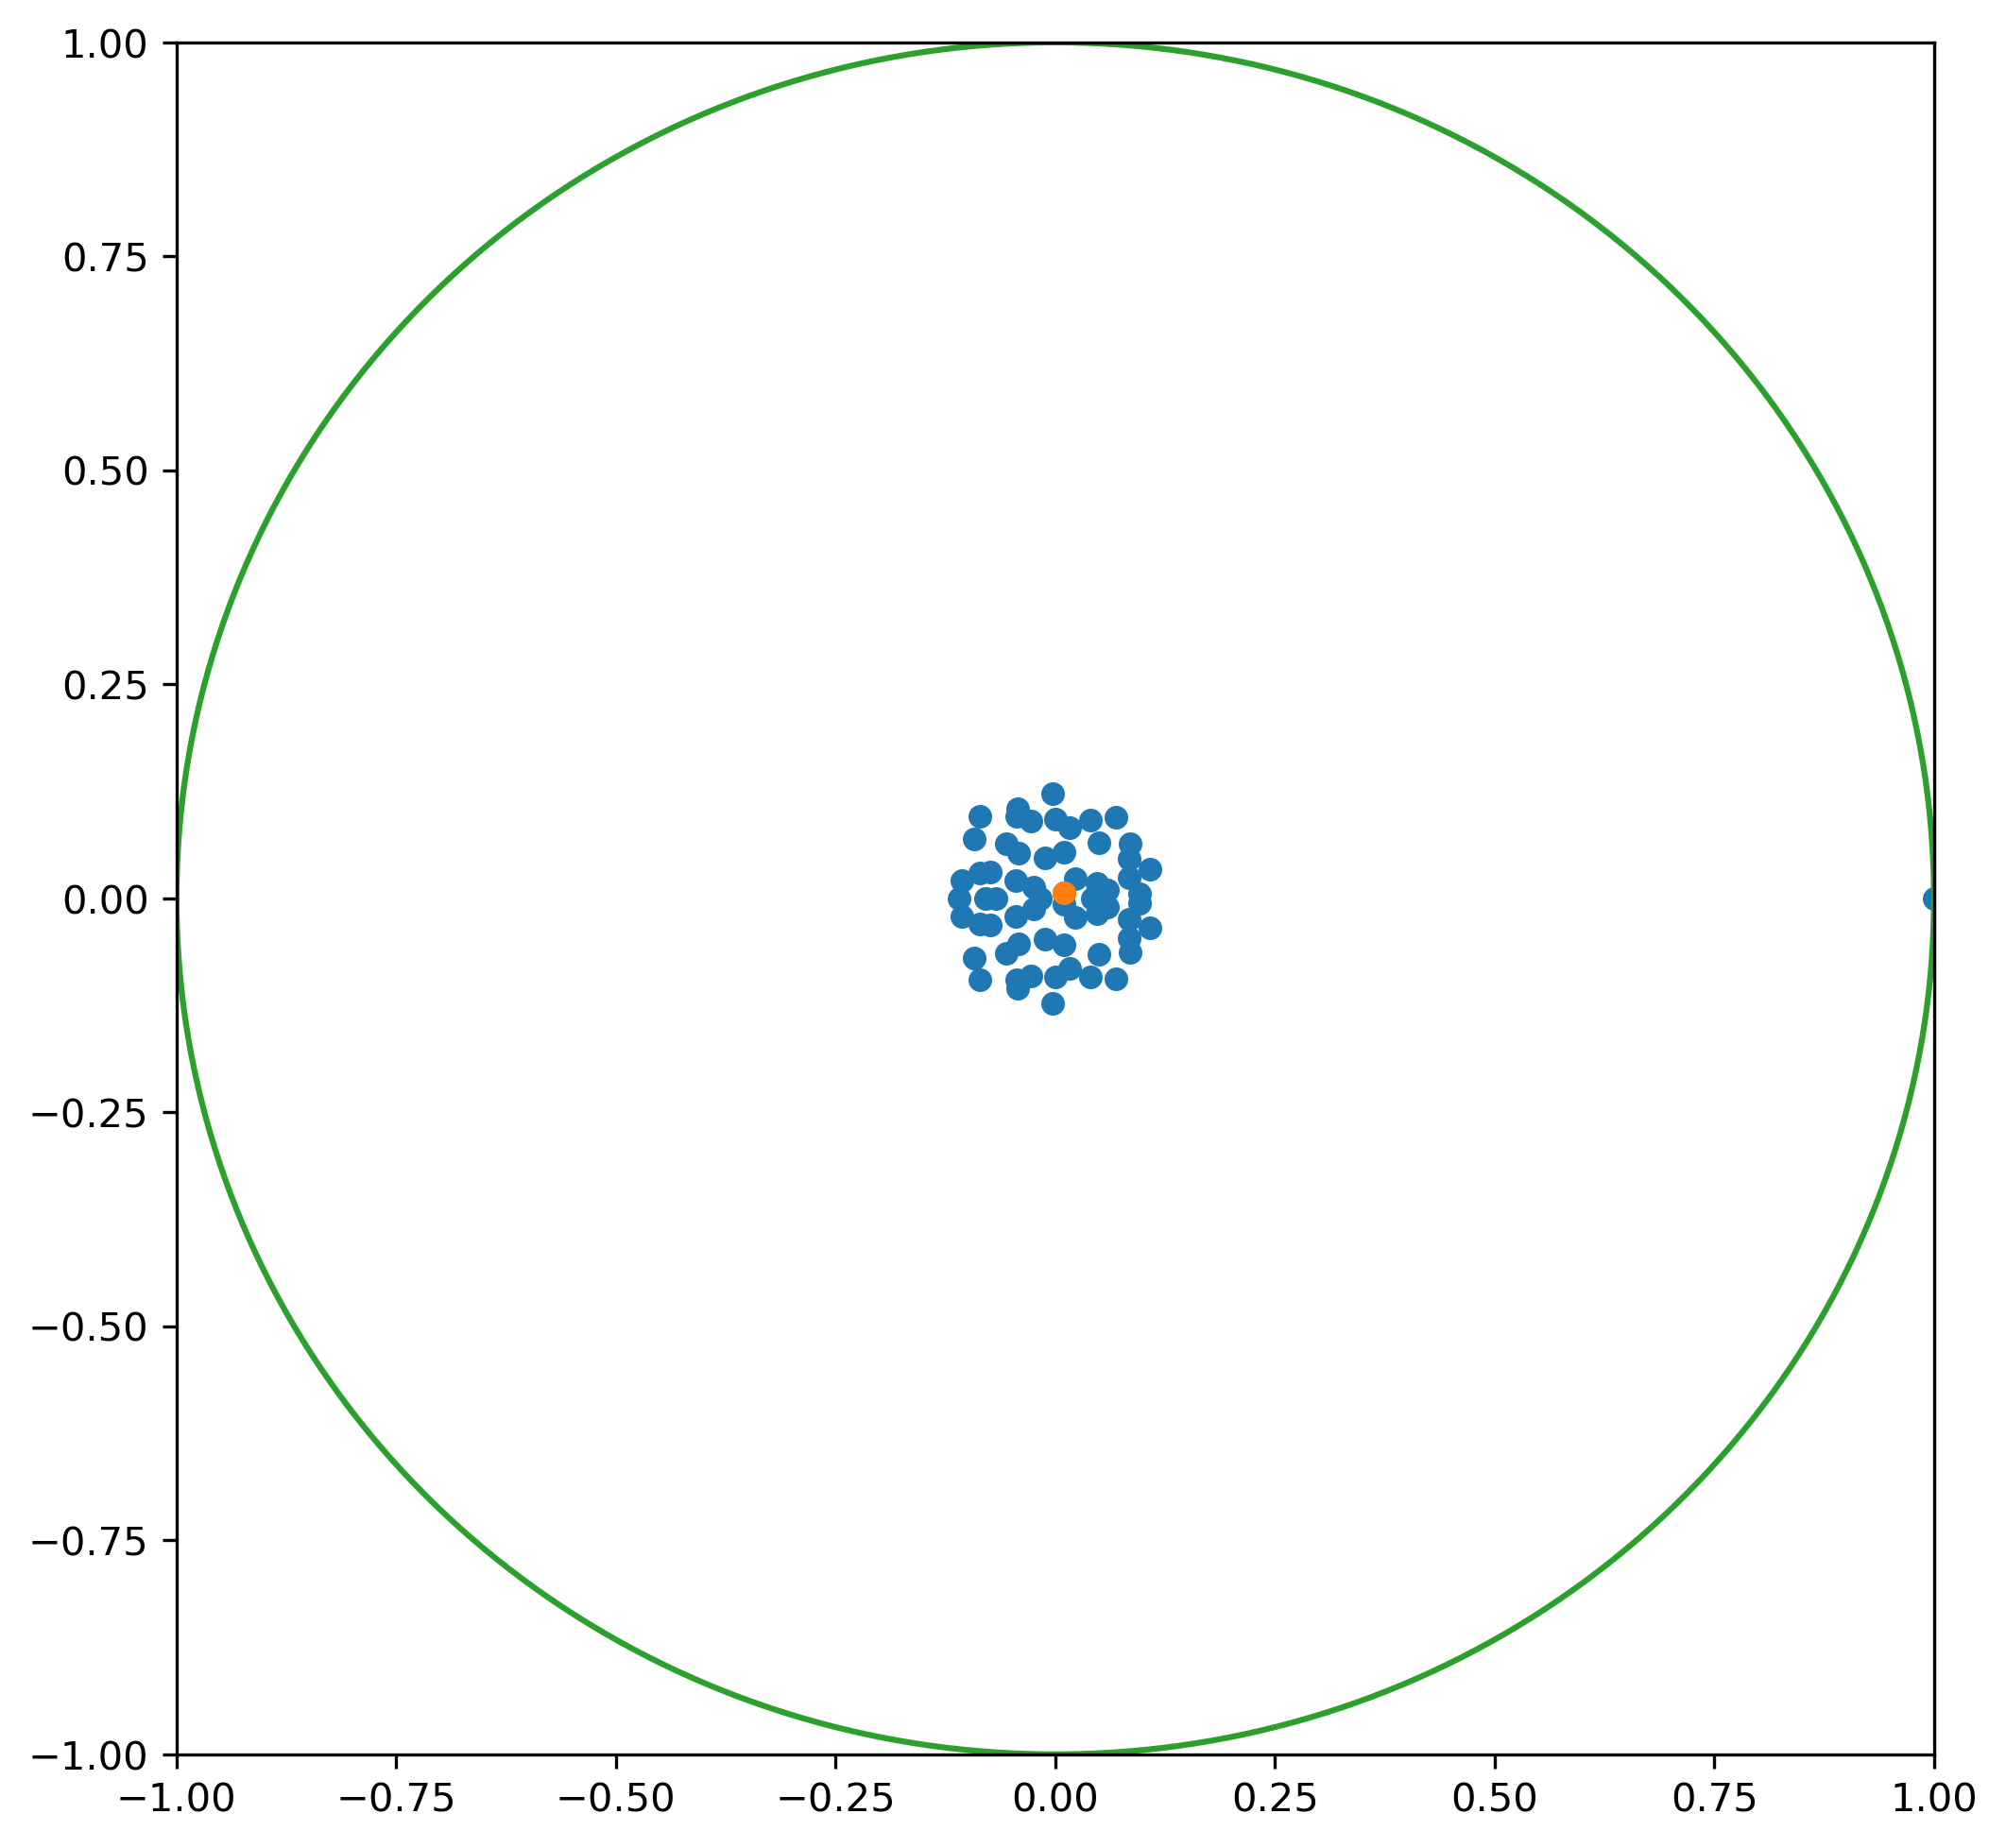

In [44]:
spectrum = channel_spectrum(model.channel)

t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(spectrum[:,0], spectrum[:,1], "o", markersize=5)
plt.plot(spectrum[index,0], spectrum[index,1], "o", markersize=5)

plt.plot(*circle)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

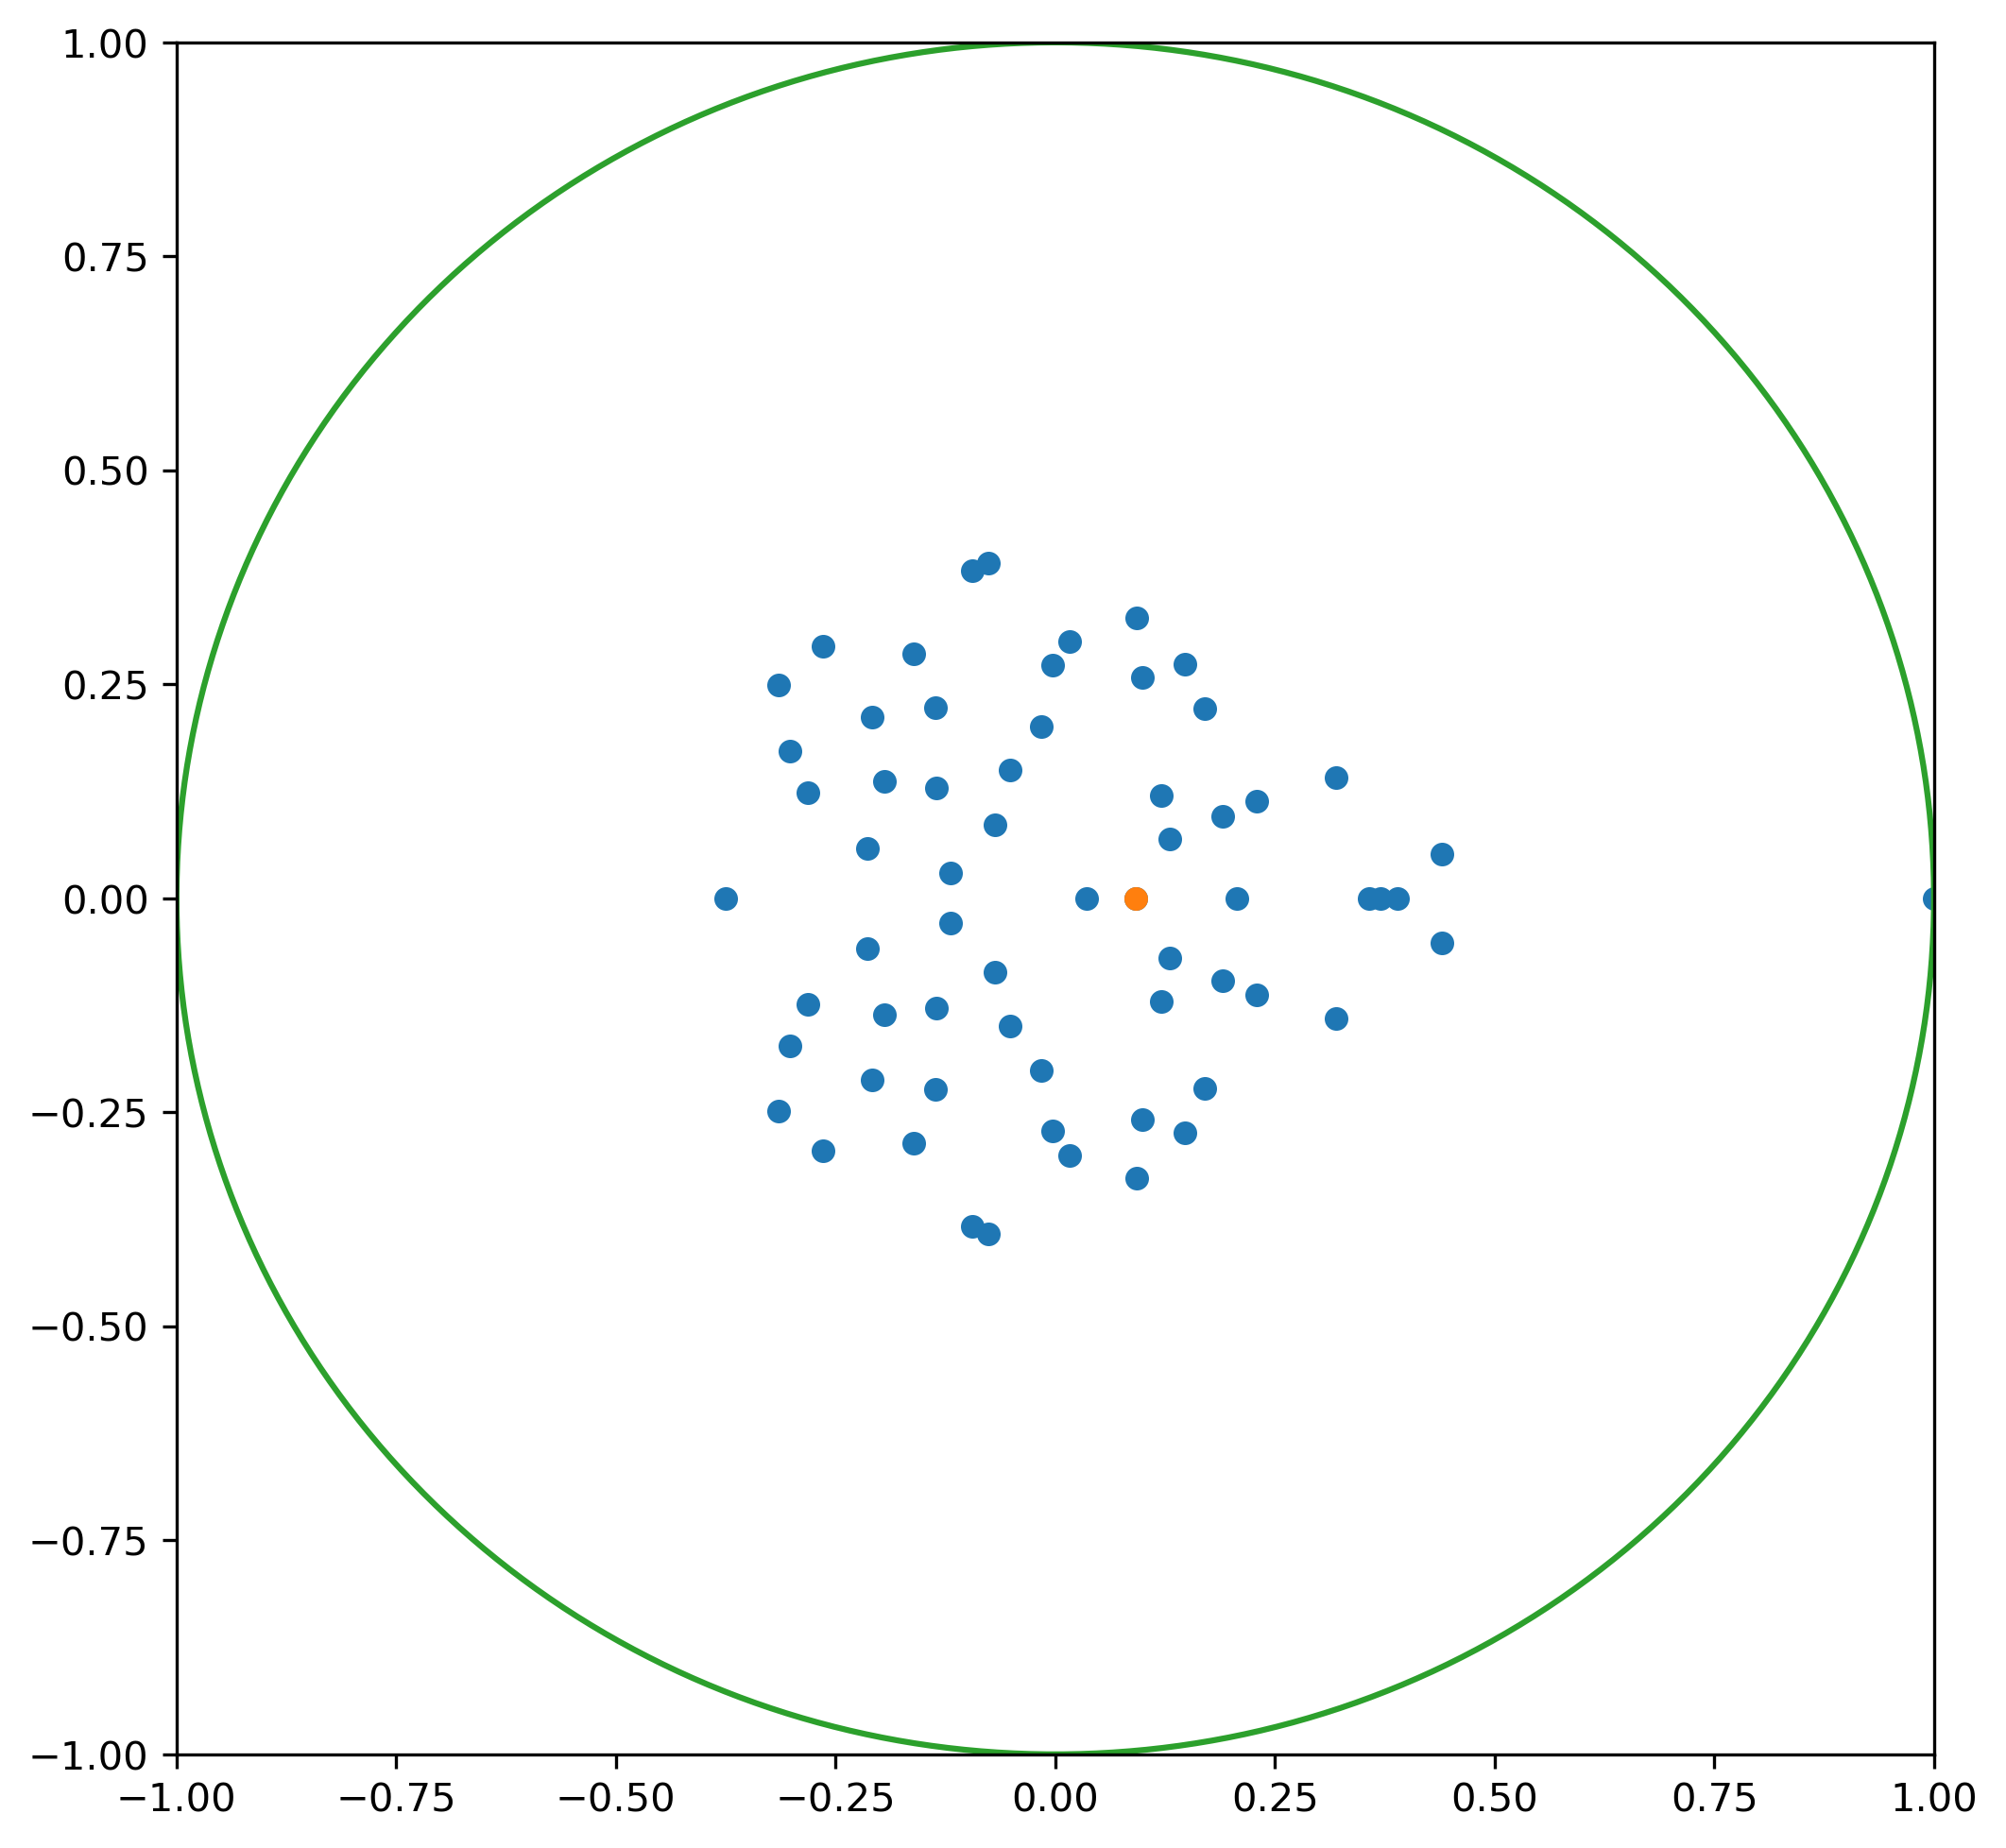

In [5]:
spectrum = channel_spectrum(model.channel)

t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(spectrum[:,0], spectrum[:,1], "o", markersize=5)
plt.plot(spectrum[1,0], spectrum[1,1], "o", markersize=5)

plt.plot(*circle)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [5]:
Conj3(index=1)._conjecture(spectrum)

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([5.1056e-009, 2.5046e-131])>

In [17]:
spectrum = normalize_spectrum(spectrum, scale = 0.5)

0.2


In [18]:
Conj3(index=1)._conjecture(spectrum)

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([1.3425e-008, 6.5859e-131])>

In [14]:
def spectrum_to_radial(spectrum):
    radial = tf.norm(spectrum, axis=1)
    return radial

def spectrum_to_angular(spectrum):
    angular = tf.math.angle(spectrum[:-1,0] + 1j*spectrum[:-1,1])
    return angular

def angular_histogram(spectrum_list, bins, color="b"):
    angular_list = [spectrum_to_angular(spectrum) for spectrum in spectrum_list]
    angular = np.concatenate(angular_list)
    plt.hist(angular, bins, color=color)

def find_outer_inner_R(spectrum_list):
    L = len(spectrum_list)
    radial_list = np.array([np.sort(spectrum_to_radial(spectrum)) for spectrum in spectrum_list])
    R_minus = np.mean(radial_list[:,0])
    R_minus_std = np.std(radial_list[:,0])
    R_plus = np.mean(radial_list[:,-1])
    R_plus_std = np.std(radial_list[:,-1])
    return R_plus, R_minus, R_plus_std, R_minus_std

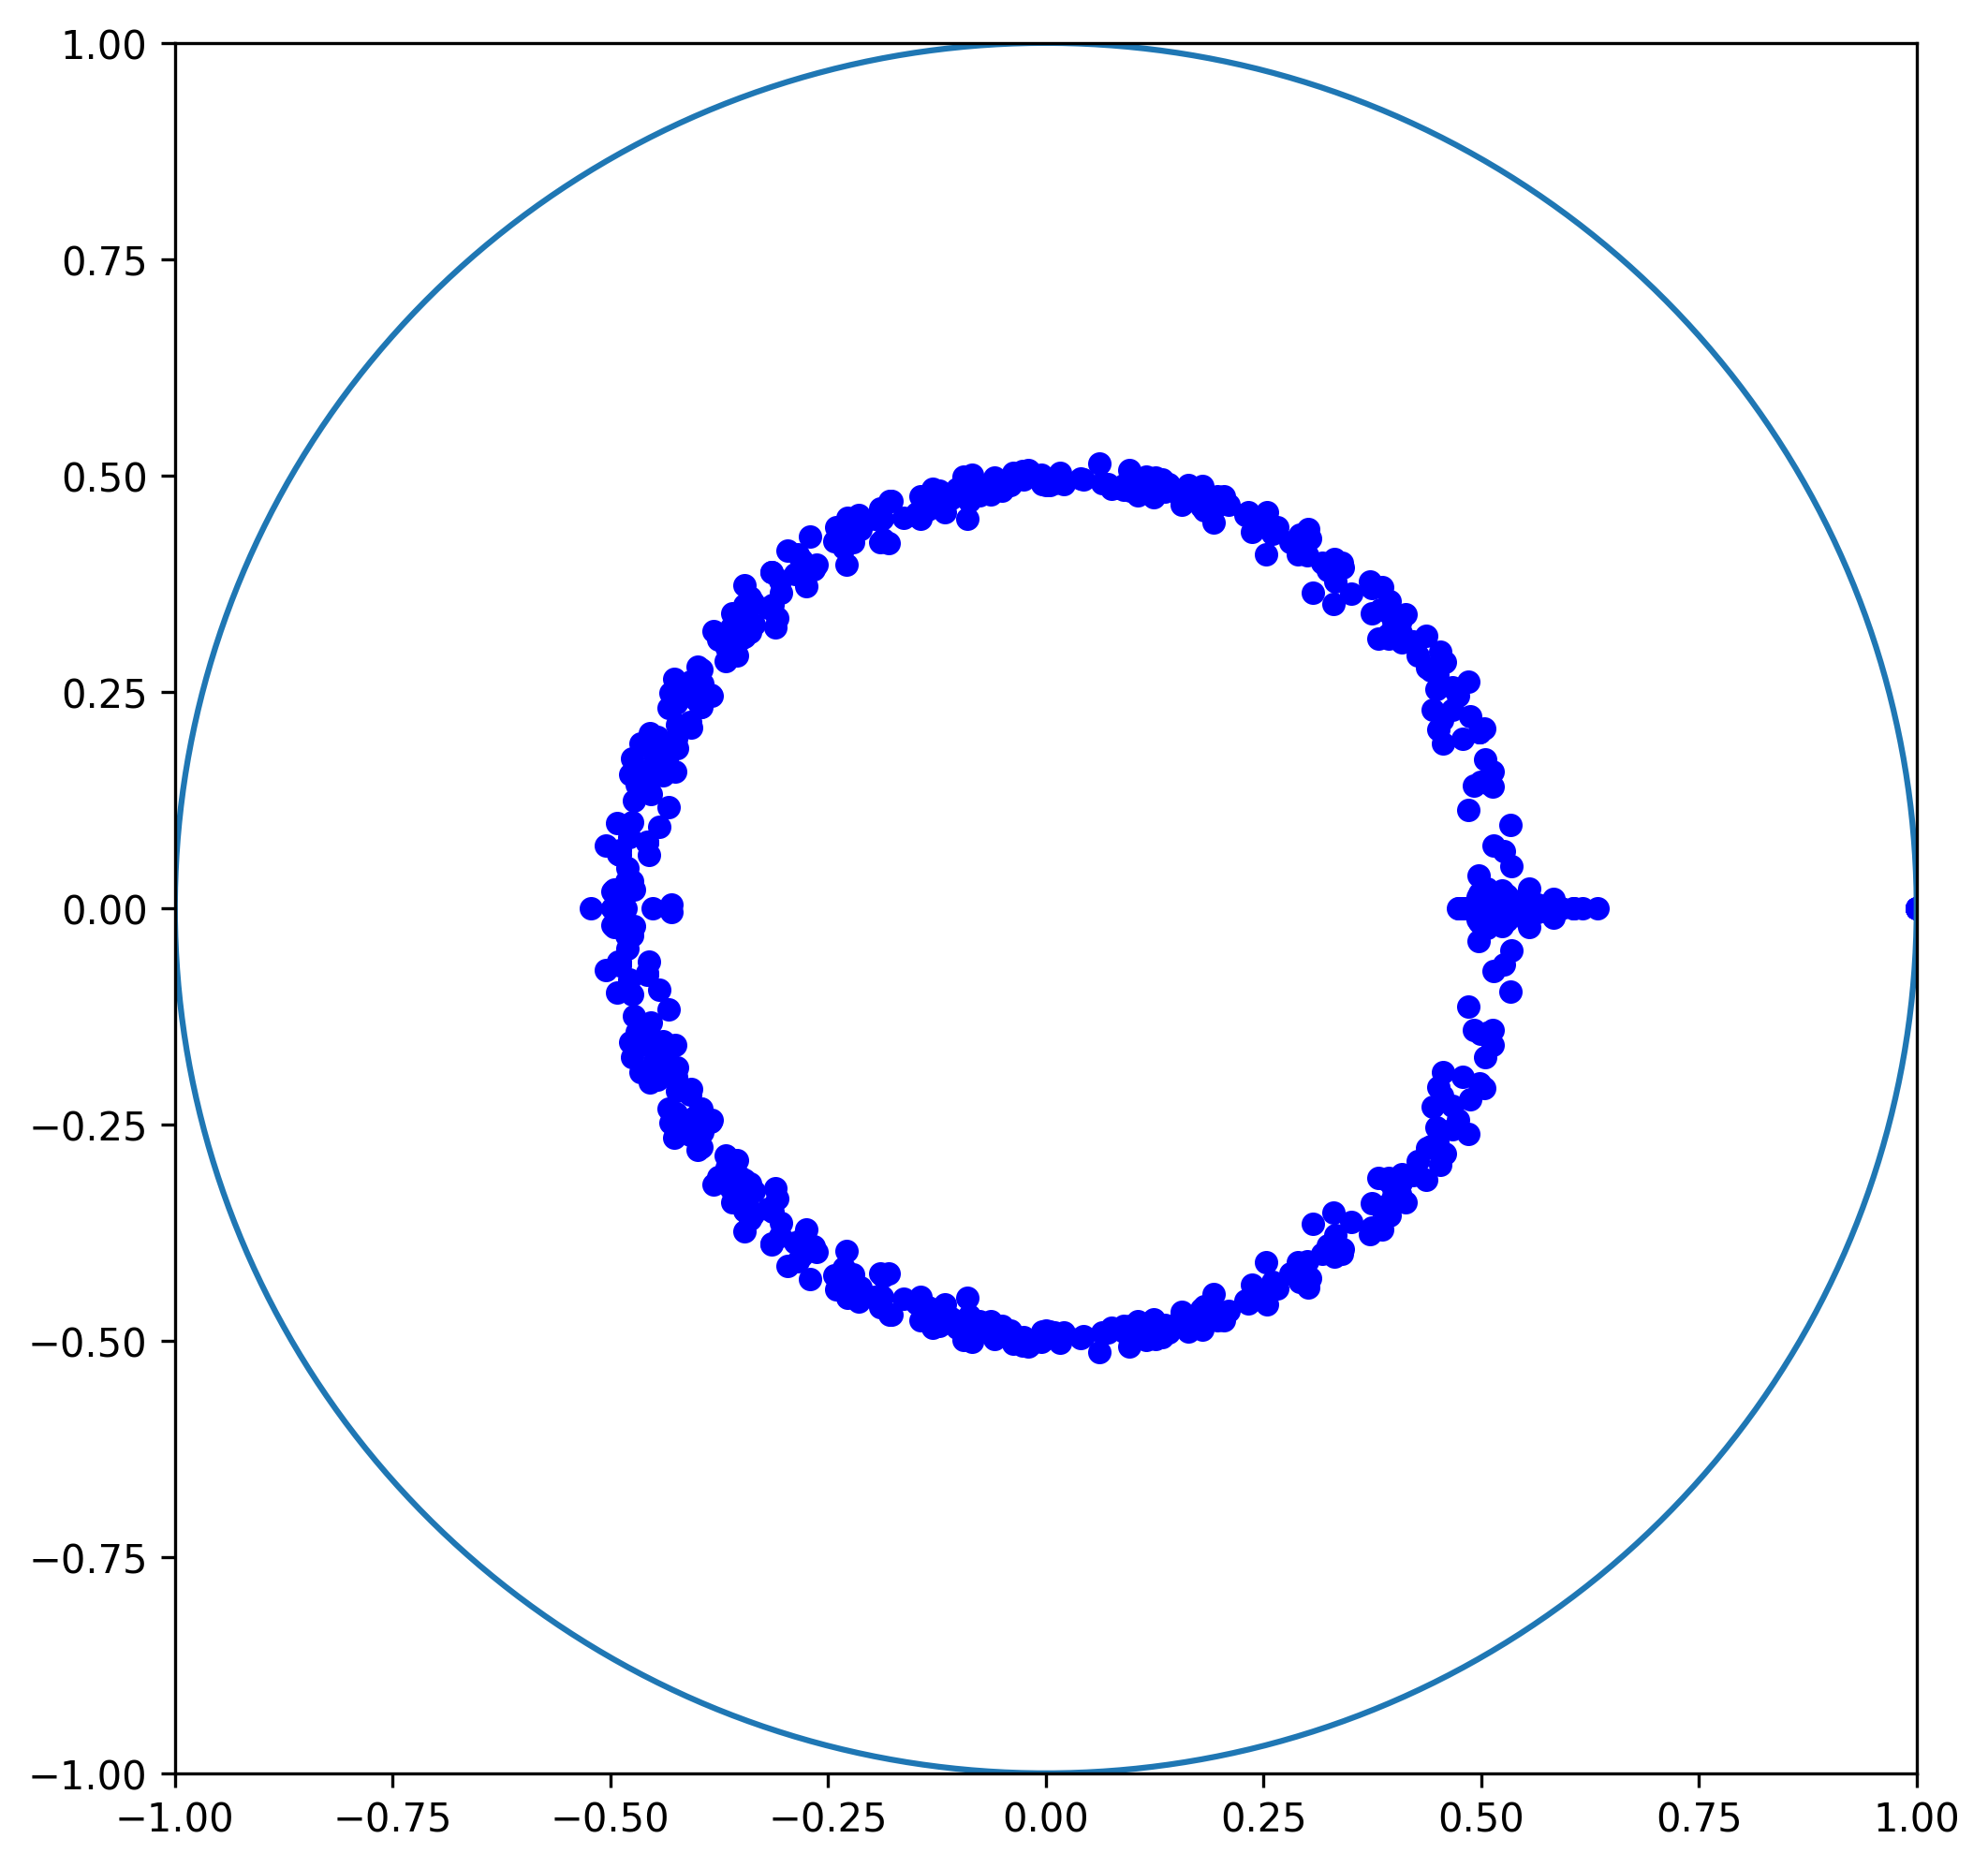

In [19]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]
spectrum_list = []

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
for i in range(10):
    U = generate_unitary(8)
    kraus_part = TwoLocalKrausMap(8)
    kraus_target = DilutedKrausMap(U=U, c=0.5, kraus_part=kraus_part)
    spectrum = channel_spectrum(kraus_target)
    spectrum_list.append(spectrum)
    plt.plot(spectrum[:,0], spectrum[:,1], "bo", markersize=5)
    
plt.plot(*circle)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

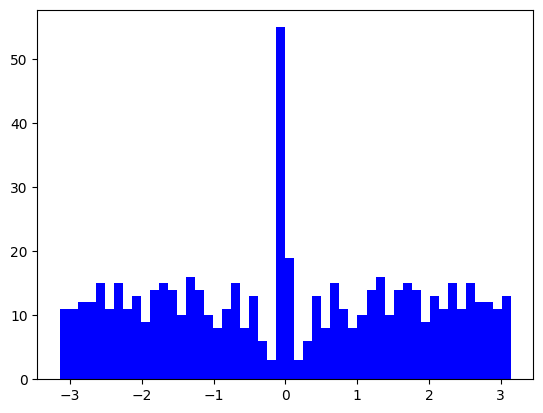

In [20]:
angular_histogram(spectrum_list, bins=np.linspace(-np.pi, np.pi, 51), color="b")

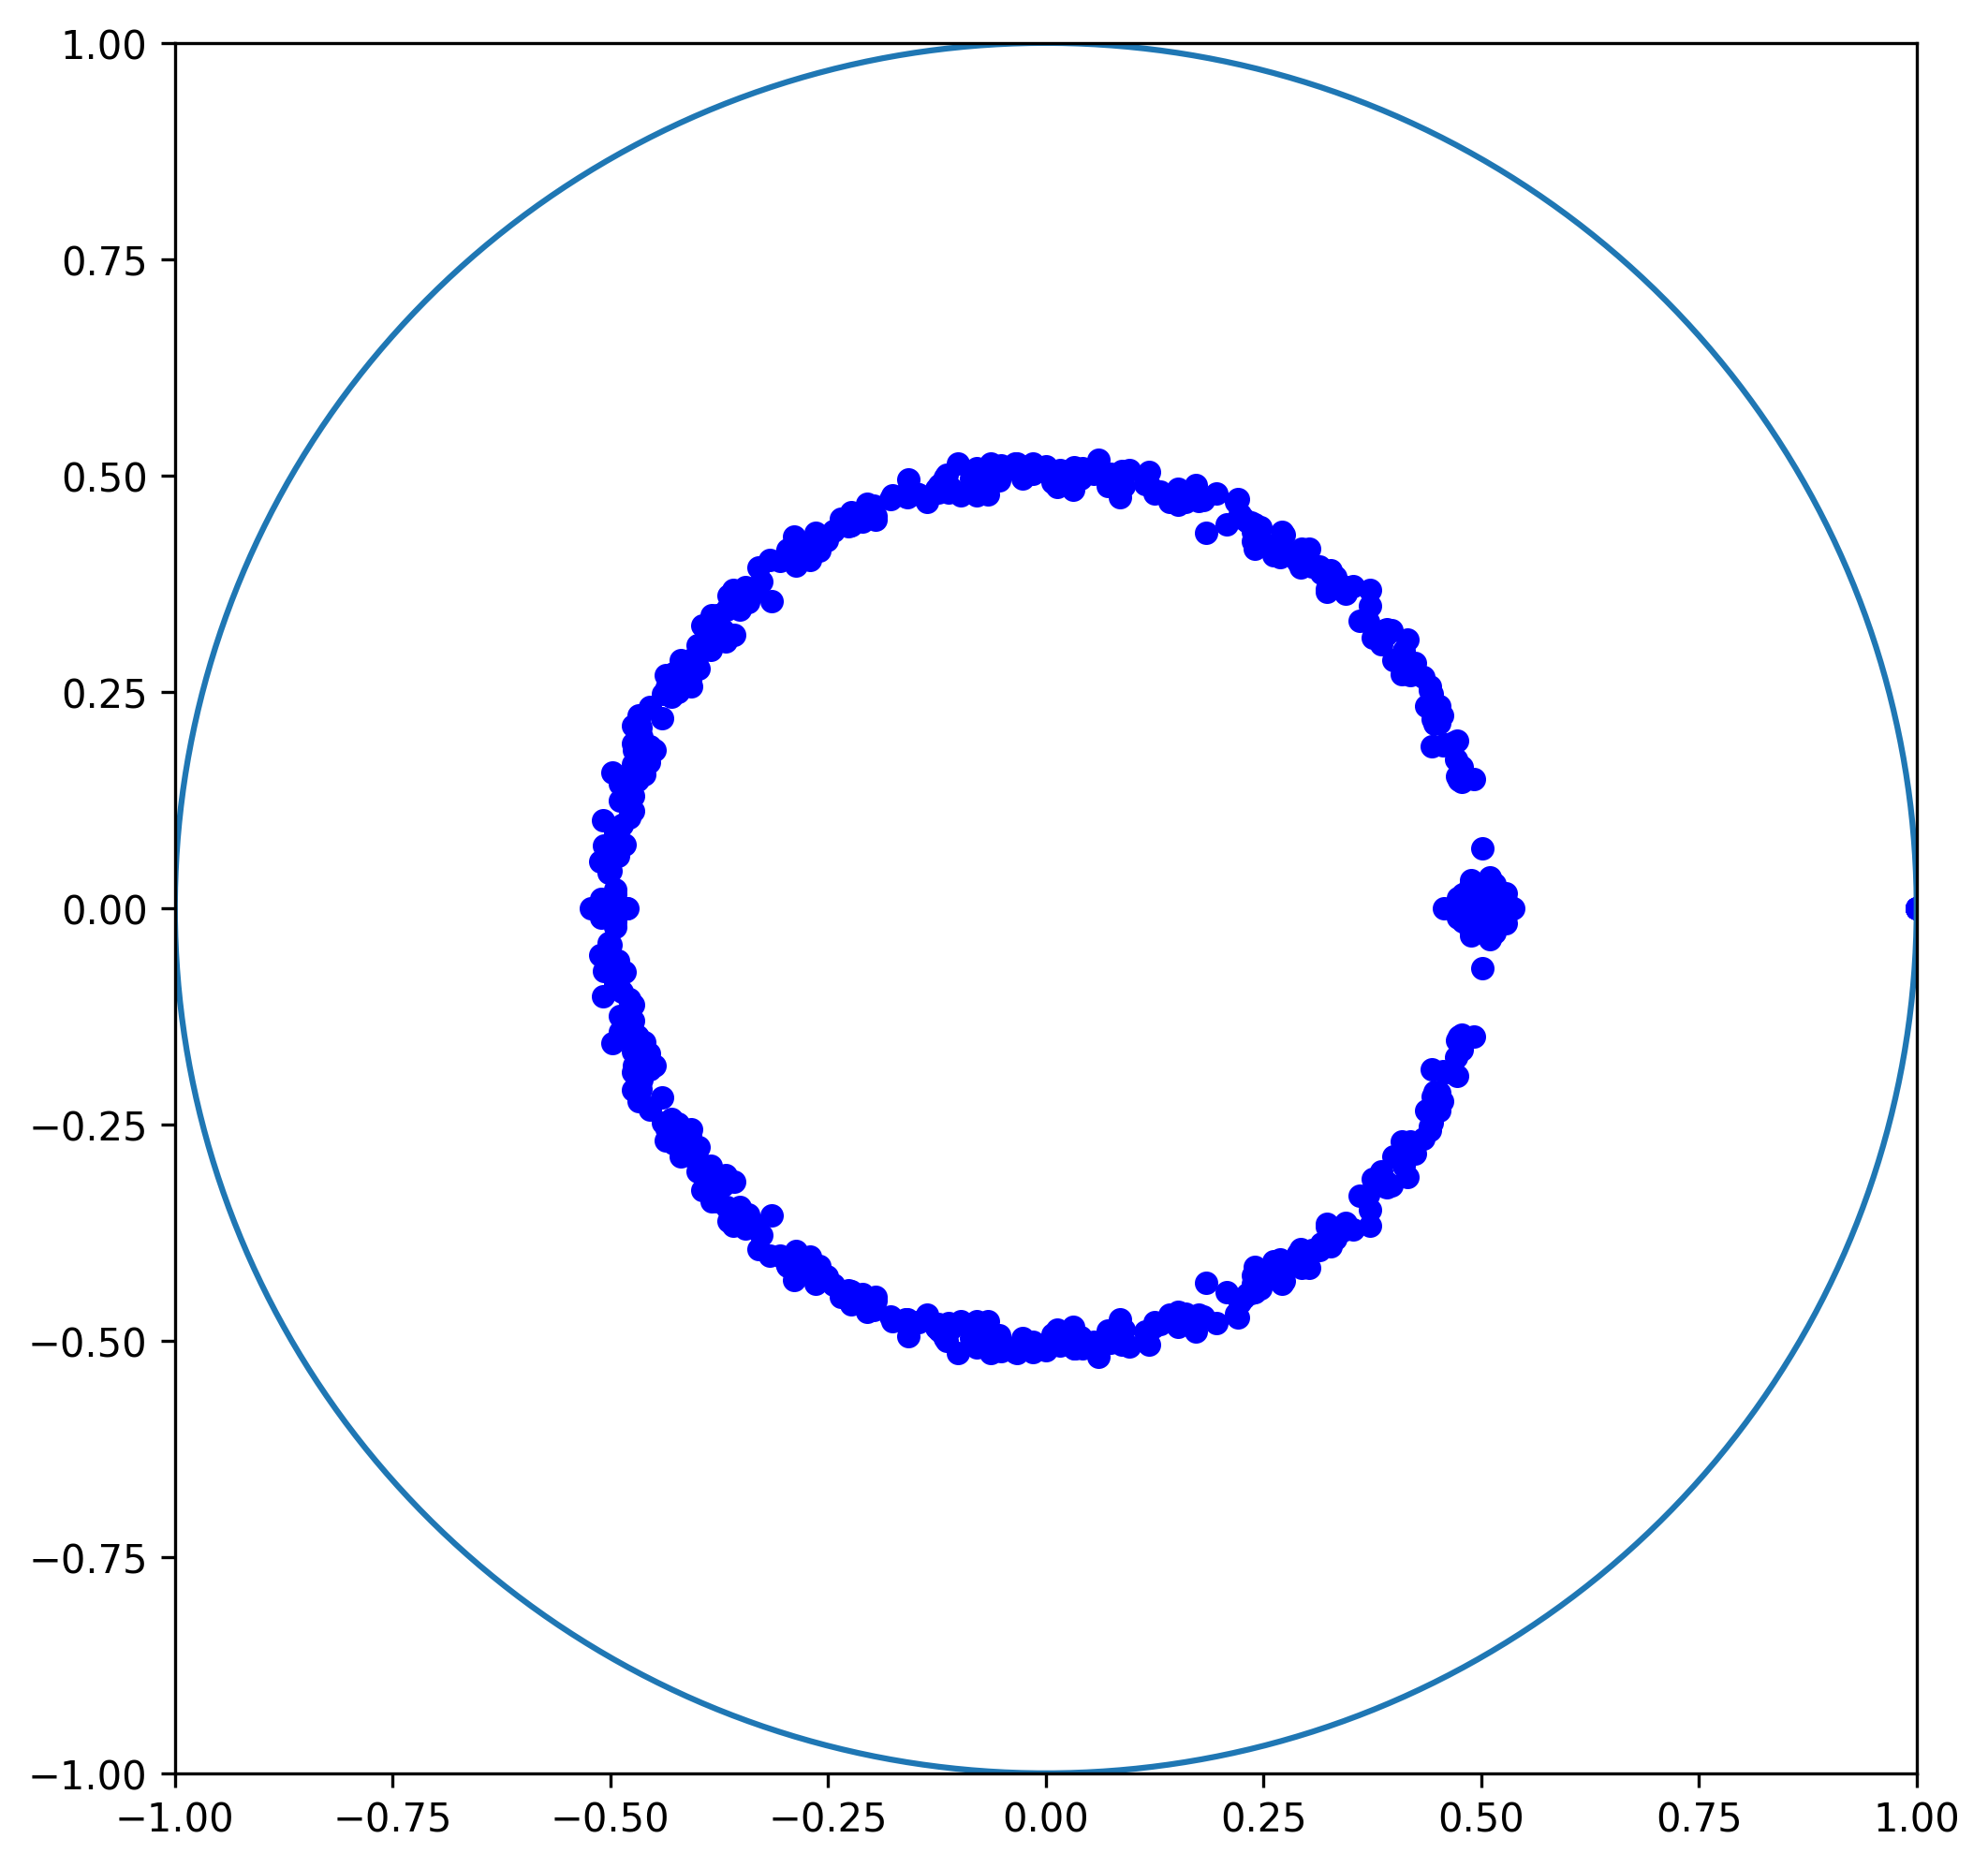

In [21]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


t = np.linspace(0, 2*np.pi, 1000)
circle = [np.sin(t), np.cos(t)]

fig=plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
for i in range(10):
    U = generate_unitary(8)
    kraus_part = KrausMap(8,32)
    kraus_target = DilutedKrausMap(U=U, c=0.5, kraus_part=kraus_part)
    spectrum = channel_spectrum(kraus_target)
    plt.plot(spectrum[:,0], spectrum[:,1], "bo", markersize=5)
    
plt.plot(*circle)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()